In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Fri Dec  1 12:22:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3ehT9yD2Z1q3e5vQAwxt")
project = rf.workspace("dishanka-kalita").project("satriya-dance-mudra-detection")
dataset = project.version(4).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existin

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.221, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Satriya-Dance-Mudra-Detection-4 in yolov8:: 100%|██████████| 10476/10476 [00:01<00:00, 5746.40it/s]


In [ ]:
from ultralytics import RTDETR

# Load a COCO-pretrained RT-DETR-l model
model = RTDETR('rtdetr-l.pt')

# Display model information (optional)
model.info()

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/content/Satriya-Dance-Mudra-Detection-4/data.yaml", epochs=50, imgsz=640)

# Run inference with the RT-DETR-l model on the random image
results = model('/content/Satriya-Dance-Mudra-Detection-4/test/images/unscreen-005_png.rf.433dd3c628a364b57693c1b08ac26018.jpg')

100%|██████████| 63.4M/63.4M [00:00<00:00, 216MB/s]


rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/content/Satriya-Dance-Mudra-Detection-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=8
WARNING ⚠️ no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1     25248  ultralytics.nn.modules.block.HGStem          [3, 32, 48]                   
  1                  -1  6    155072  ultralytics.nn.modules.block.HGBlock         [48, 48, 128, 3, 6]           
  2                  -1  1      1408  ultralytics.nn.modules.conv.DWConv           [128, 128, 3, 2, 1, False]    
  3                  -1  6    839296  ultralytics.nn.modules.block.HGBlock         [128, 96, 512, 3, 6]          
  4                  -1  1      5632  ultralytics.nn.modules.conv.DWConv           [512, 512, 3, 2, 1, False]    
  5                  -1  6   1695360  ultralytics.nn.modules.block.HGBlock         [512, 192, 1024, 5, 6, True, False]
  6                  -1  6   2055808  ultralytics.nn.modules.block.HGBlock         [1024, 192, 1024, 5, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 75.0MB/s]


AMP: checks passed ✅


train: Scanning /content/Satriya-Dance-Mudra-Detection-4/train/labels... 4578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4578/4578 [00:02<00:00, 2178.35it/s]


train: New cache created: /content/Satriya-Dance-Mudra-Detection-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Satriya-Dance-Mudra-Detection-4/valid/labels... 436 images, 0 backgrounds, 0 corrupt: 100%|██████████| 436/436 [00:00<00:00, 1256.91it/s]

val: New cache created: /content/Satriya-Dance-Mudra-Detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)


Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!


WARNING ⚠️ TensorBoard graph visualization failure 'NoneType' object is not subscriptable
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       1/50      13.3G     0.6119      7.544     0.7824          5        640: 100%|██████████| 287/287 [05:29<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10<00:00,  1.38it/s]

                   all        436        436      0.922      0.908      0.951      0.684



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       2/50      13.6G     0.3613     0.7075     0.4372          2        640: 100%|██████████| 287/287 [05:25<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        436        436      0.955      0.987      0.987      0.717



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       3/50      13.6G     0.3416     0.6907     0.4093          3        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        436        436      0.974          1       0.99      0.722



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       4/50      13.6G     0.3275      0.632     0.3966          6        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        436        436      0.978      0.933      0.949       0.67



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       5/50      13.5G     0.3226     0.5911     0.3818          6        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        436        436       0.98          1      0.995      0.792



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       6/50      13.6G     0.3137     0.5644     0.3799          6        640: 100%|██████████| 287/287 [05:25<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        436        436       0.99          1      0.995       0.79



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       7/50      13.6G      0.311     0.5462     0.3676          5        640: 100%|██████████| 287/287 [05:25<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436       0.99          1      0.994      0.796



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       8/50      13.6G     0.3041     0.5284     0.3674          5        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        436        436       0.99          1      0.994      0.792



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
       9/50      13.5G     0.2987     0.5314     0.3541          5        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        436        436      0.998          1      0.995      0.787



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      10/50      13.6G     0.2937     0.5121     0.3507          3        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        436        436      0.997      0.998      0.995      0.789



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      11/50      13.6G     0.2921     0.5022     0.3469          4        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        436        436      0.995          1      0.995      0.786



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      12/50      13.6G     0.2877     0.4818     0.3412          6        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.57it/s]

                   all        436        436      0.992          1      0.991      0.803



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      13/50      13.5G     0.2824     0.4754     0.3339          5        640: 100%|██████████| 287/287 [05:22<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        436        436      0.995          1      0.995      0.798



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      14/50      13.6G     0.2766     0.4788     0.3258          4        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]

                   all        436        436      0.994          1      0.995       0.79



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      15/50      13.6G     0.2799     0.4619     0.3293          4        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]

                   all        436        436      0.998          1      0.995      0.798



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      16/50      13.6G     0.2792     0.4425     0.3257          4        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]

                   all        436        436      0.998          1      0.995      0.807



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      17/50      13.5G     0.2731      0.452     0.3235          5        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        436        436      0.998          1      0.995      0.816



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      18/50      13.6G     0.2711     0.4434     0.3185          5        640: 100%|██████████| 287/287 [05:22<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        436        436      0.997          1      0.995      0.808



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      19/50      13.6G     0.2682     0.4445     0.3194          3        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        436        436      0.994          1      0.993      0.802



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      20/50      13.6G     0.2632     0.4306      0.313          8        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        436        436      0.998          1      0.995      0.805



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      21/50      13.5G     0.2636     0.4272     0.3084          5        640: 100%|██████████| 287/287 [05:22<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        436        436      0.996          1      0.993      0.789



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      22/50      13.6G     0.2667     0.4203     0.3134          4        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        436        436      0.992          1      0.992        0.8



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      23/50      13.6G     0.2616     0.4264     0.3063          5        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.53it/s]

                   all        436        436      0.996          1      0.995      0.811



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      24/50      13.6G     0.2603     0.4145     0.3058          3        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.997          1      0.995      0.818



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      25/50      13.5G     0.2589     0.4106     0.3024          5        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        436        436      0.996          1      0.995      0.813



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      26/50      13.6G     0.2551     0.4095     0.2992          2        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]

                   all        436        436      0.994          1      0.993      0.813



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      27/50      13.6G     0.2527     0.4052      0.295          4        640: 100%|██████████| 287/287 [05:27<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.998          1      0.995      0.812



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      28/50      13.6G     0.2511     0.4006     0.2953          2        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        436        436      0.997          1      0.995      0.811



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      29/50      13.4G     0.2489     0.4026     0.2889          6        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.67it/s]

                   all        436        436      0.997          1      0.995      0.811



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      30/50      13.6G     0.2484     0.3915     0.2884          2        640: 100%|██████████| 287/287 [05:22<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        436        436      0.998          1      0.995      0.819



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      31/50      13.6G     0.2465     0.3948     0.2853          3        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.994          1      0.995      0.817



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      32/50      13.6G     0.2444     0.3961     0.2853          2        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        436        436      0.997          1      0.995       0.81



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      33/50      13.5G     0.2421     0.3797     0.2771          4        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.59it/s]

                   all        436        436      0.994          1      0.995      0.818



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      34/50      13.6G     0.2416     0.3849     0.2792          2        640: 100%|██████████| 287/287 [05:22<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]

                   all        436        436      0.997          1      0.995      0.817



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      35/50      13.6G     0.2369     0.3737     0.2743          3        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        436        436      0.997          1      0.995      0.809



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      36/50      13.6G      0.233     0.3813      0.269          8        640: 100%|██████████| 287/287 [05:25<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.58it/s]

                   all        436        436      0.997          1      0.995      0.815



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      37/50      13.5G     0.2346     0.3798     0.2715          3        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]

                   all        436        436      0.997          1      0.995      0.815



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      38/50      13.6G      0.234     0.3832      0.267          7        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        436        436      0.995          1      0.995      0.822



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      39/50      13.6G     0.2296     0.3643     0.2631          8        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.997          1      0.995       0.82



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      40/50      13.5G     0.2272     0.3708      0.263          1        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        436        436      0.997          1      0.995      0.818


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      41/50      13.5G     0.1827     0.2758     0.3074          2        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.62it/s]

                   all        436        436      0.997          1      0.995      0.823



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      42/50      13.6G     0.1779     0.2697     0.2965          2        640: 100%|██████████| 287/287 [05:22<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        436        436      0.998          1      0.995      0.819



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      43/50      13.6G     0.1764     0.2666     0.2912          2        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.998          1      0.995      0.819



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      44/50      13.6G     0.1742      0.265     0.2887          2        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]

                   all        436        436      0.998          1      0.995      0.813



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      45/50      13.5G     0.1713     0.2621     0.2802          2        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]

                   all        436        436      0.998          1      0.995      0.816



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      46/50      13.6G     0.1681     0.2587     0.2759          2        640: 100%|██████████| 287/287 [05:21<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]

                   all        436        436      0.998          1      0.995       0.82



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      47/50      13.6G     0.1646     0.2554     0.2668          2        640: 100%|██████████| 287/287 [05:22<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.56it/s]

                   all        436        436      0.998          1      0.995      0.816



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      48/50      13.6G      0.164     0.2551     0.2668          2        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.47it/s]

                   all        436        436      0.998          1      0.995      0.816



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      49/50      13.5G     0.1607     0.2525     0.2601          2        640: 100%|██████████| 287/287 [05:24<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08<00:00,  1.61it/s]

                   all        436        436      0.998          1      0.995       0.82



      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/287 [00:00<?, ?it/s]grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:71.)
      50/50      13.6G      0.157     0.2479     0.2553          2        640: 100%|██████████| 287/287 [05:23<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.52it/s]

                   all        436        436      0.997          1      0.995      0.818



50 epochs completed in 4.688 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 66.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 66.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
rt-detr-l summary: 498 layers, 32000180 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:12<00:00,  1.08it/s]


                   all        436        436      0.997          1      0.995      0.821
             Bardhaman        436         57      0.999          1      0.995      0.762
                   Dol        436         69      0.998          1      0.995      0.809
             Gajadanta        436         45      0.997          1      0.995      0.835
                 Kaput        436         47      0.997          1      0.995      0.777
                Karkat        436         68      0.998          1      0.995      0.804
                Makar1        436         65      0.998          1      0.995      0.881
                Makar2        436         34      0.995          1      0.995      0.896
                Samput        436         51      0.997          1      0.995      0.803
Speed: 0.2ms preprocess, 17.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train

image 1/1 /content/Satriya-Dance-Mudra-Detection-4/test/images/unscreen-005_png.

In [ ]:
from IPython.display import display, Image
from IPython import display
display.clear_output()
import os

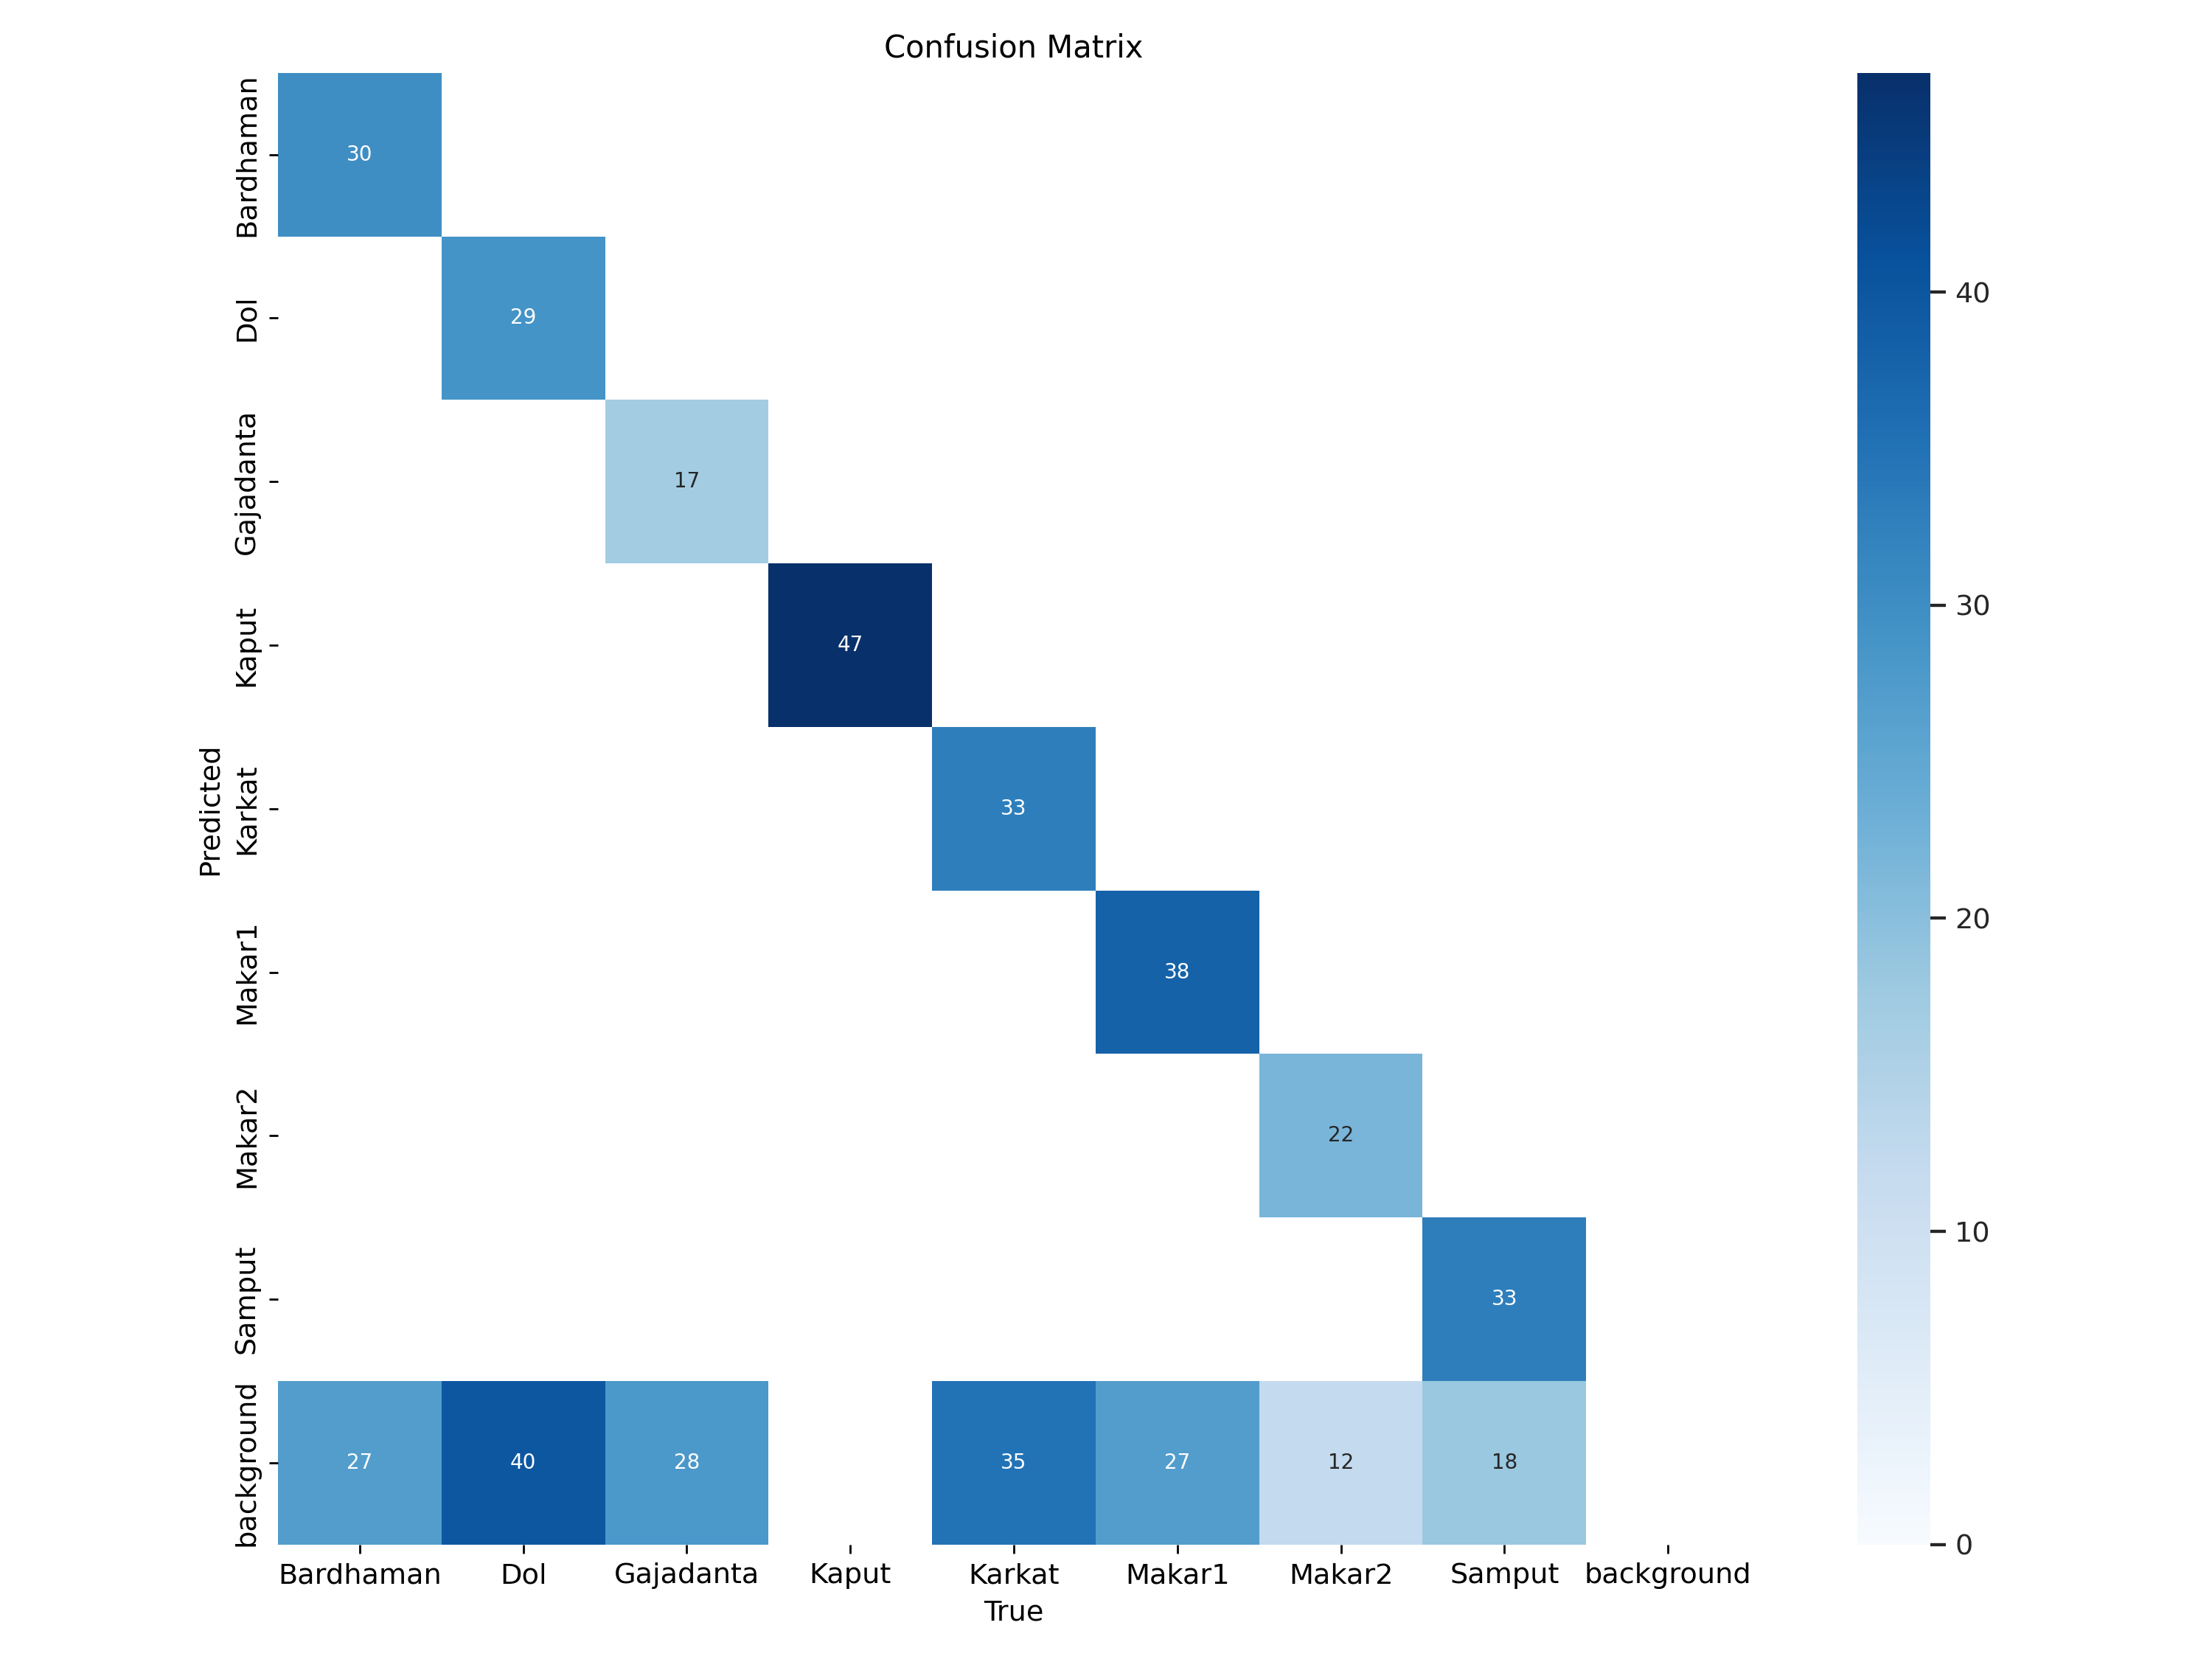

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width = 600)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!cp -r /content/runs/detect /content/drive/MyDrive/Project/RTDTR_runs

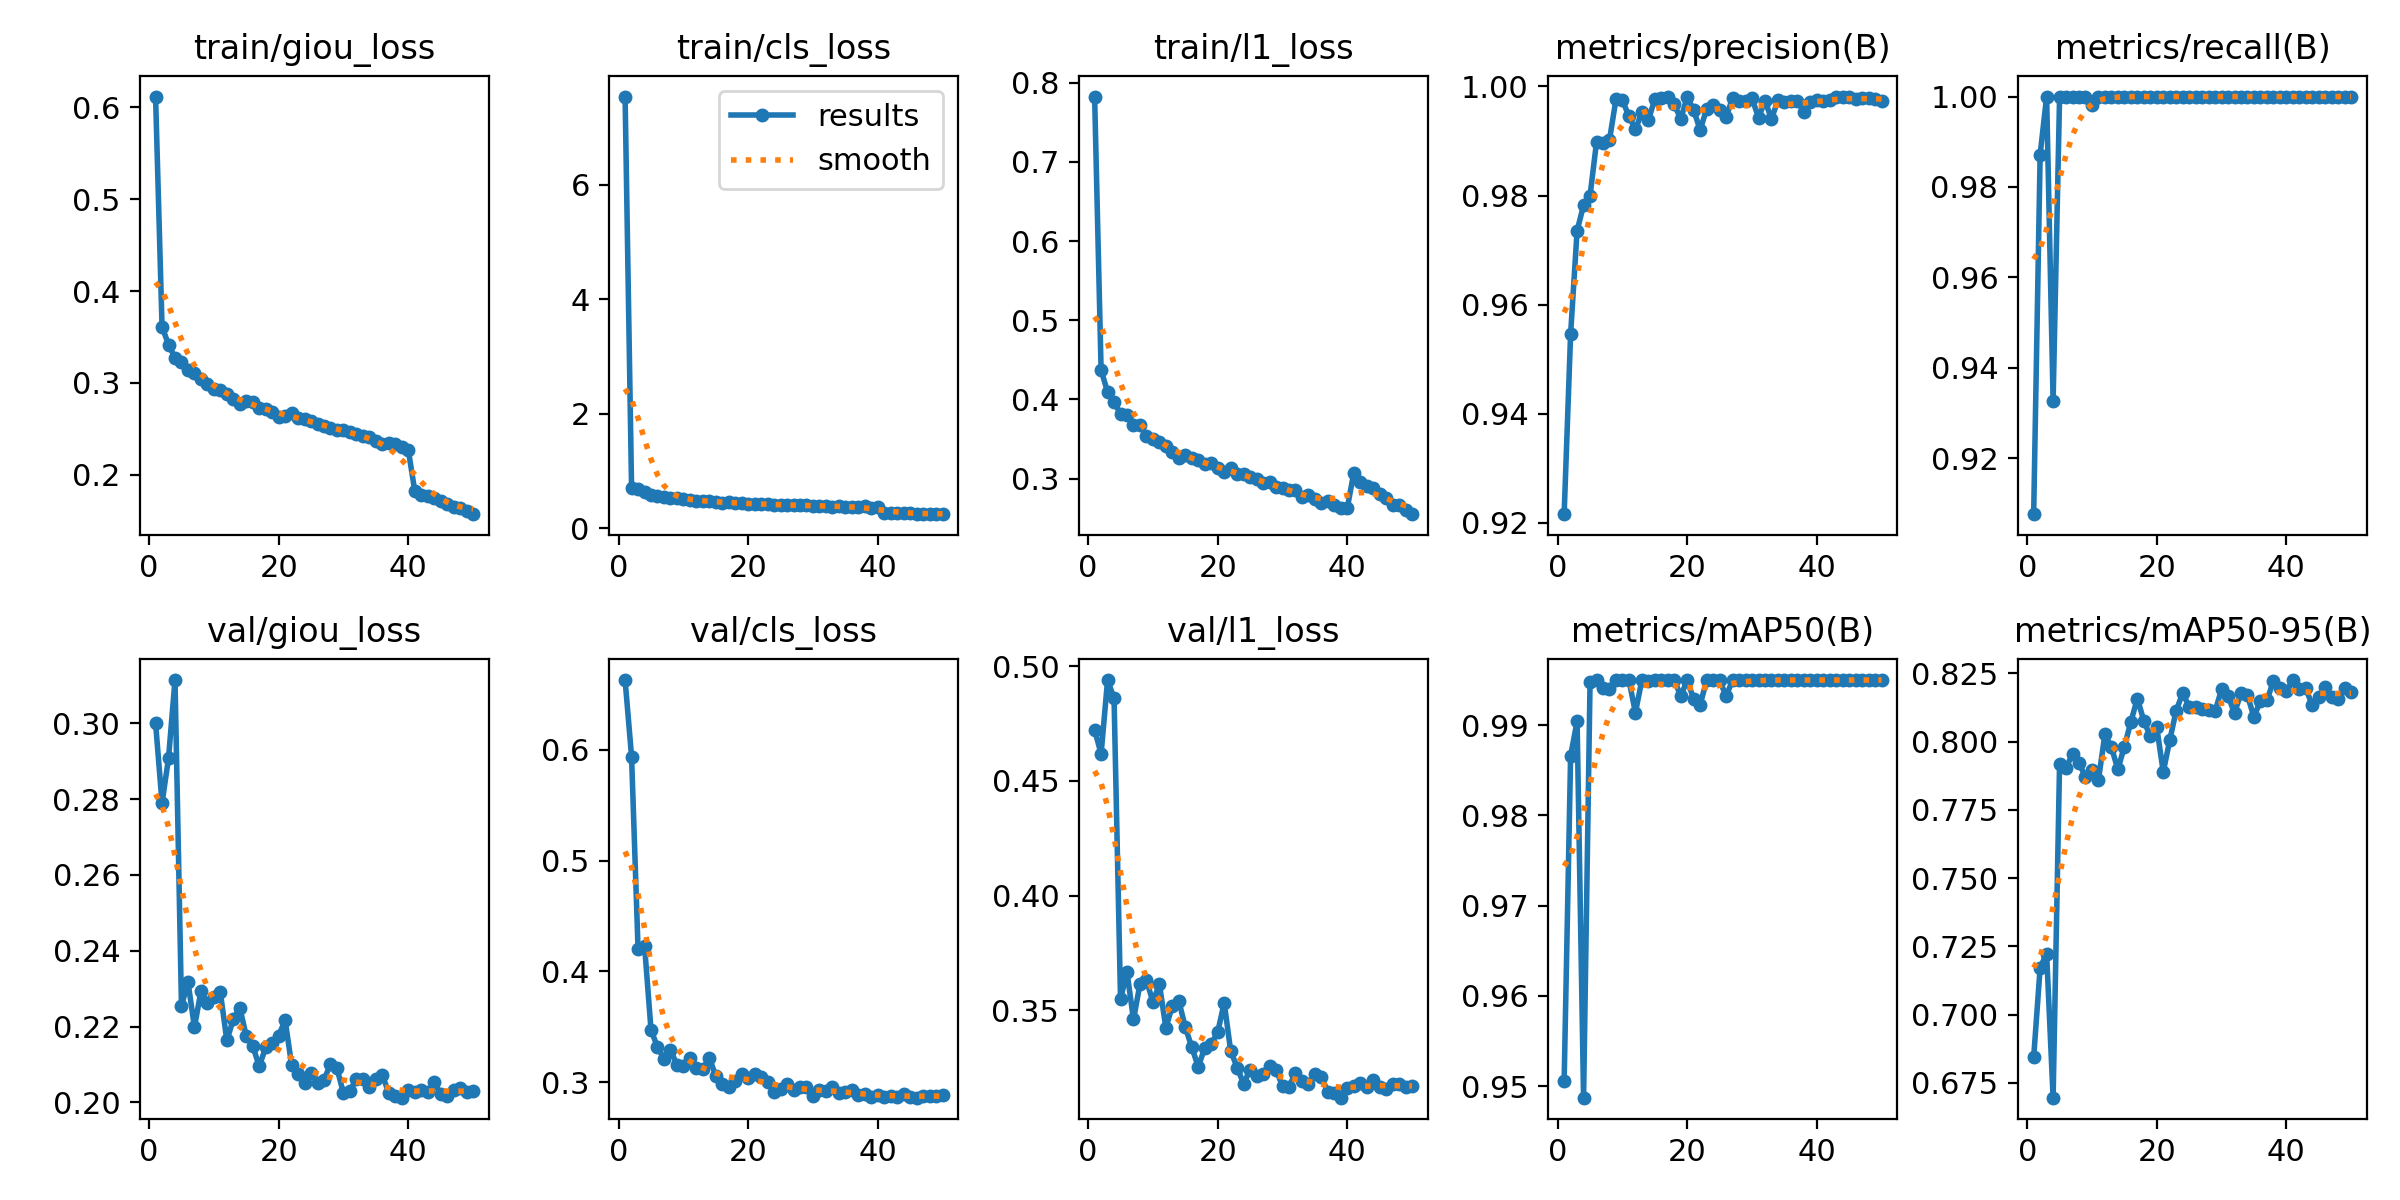

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width = 600)

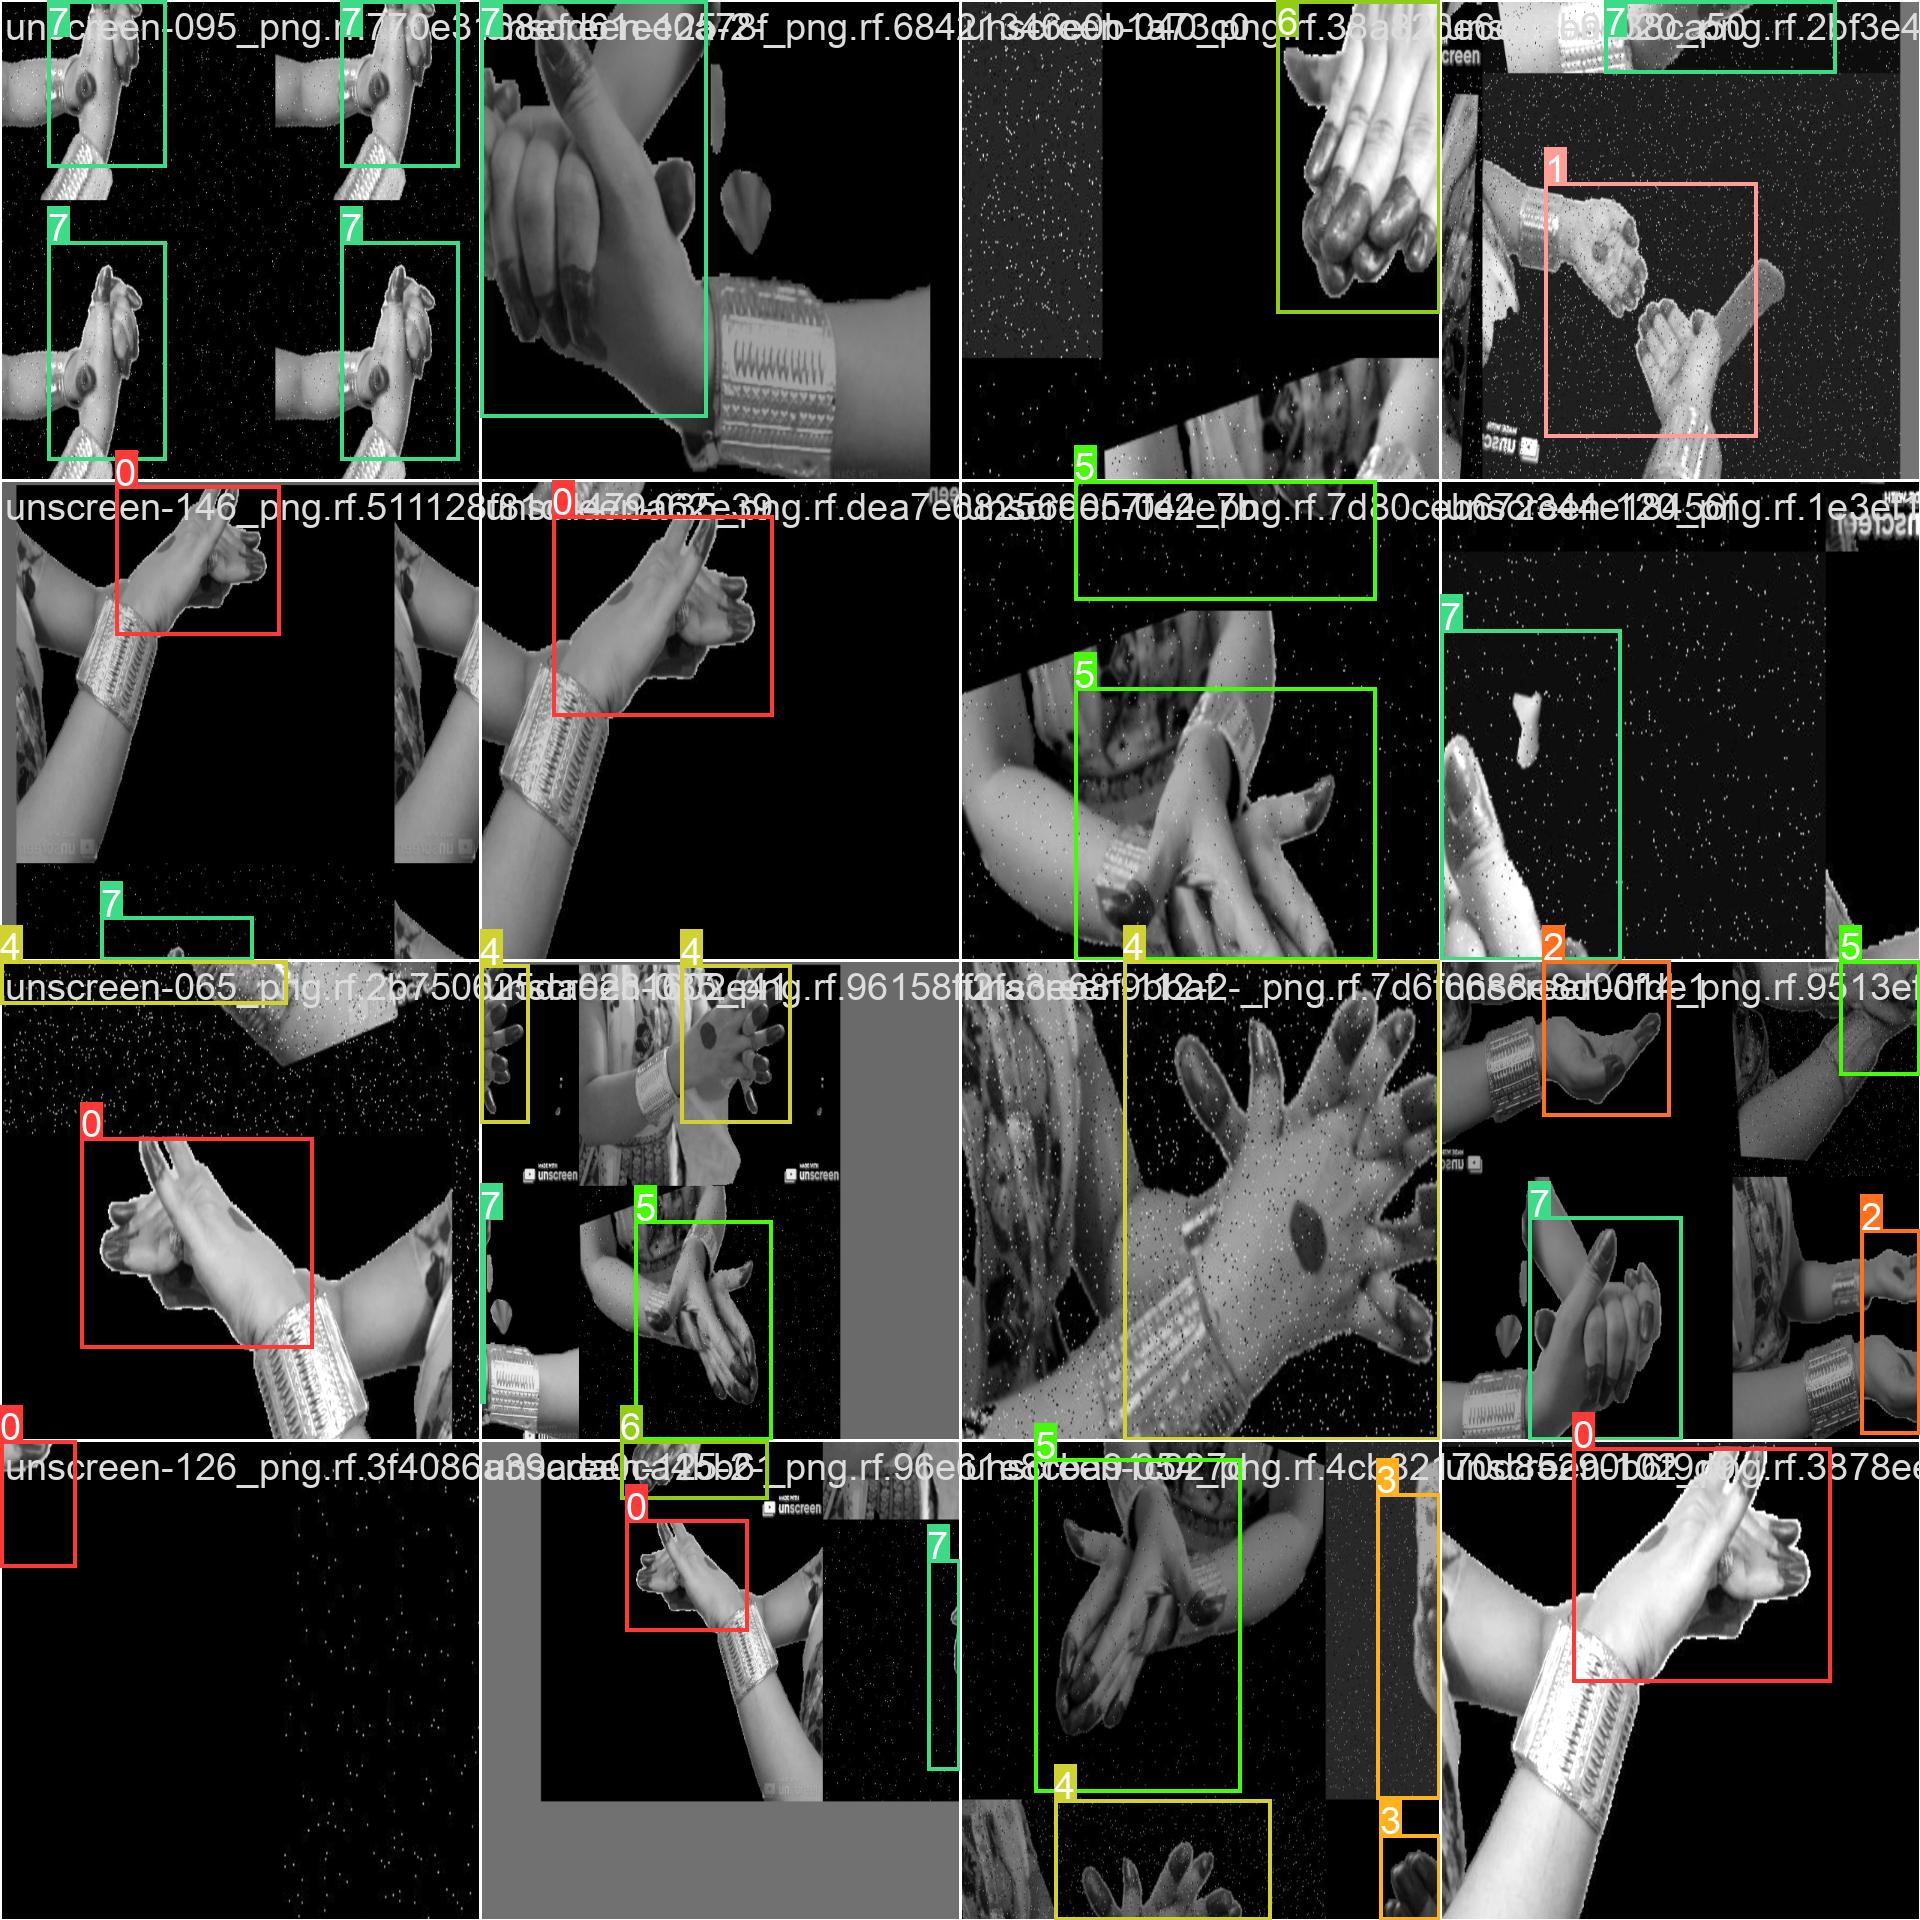

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg', width = 600)

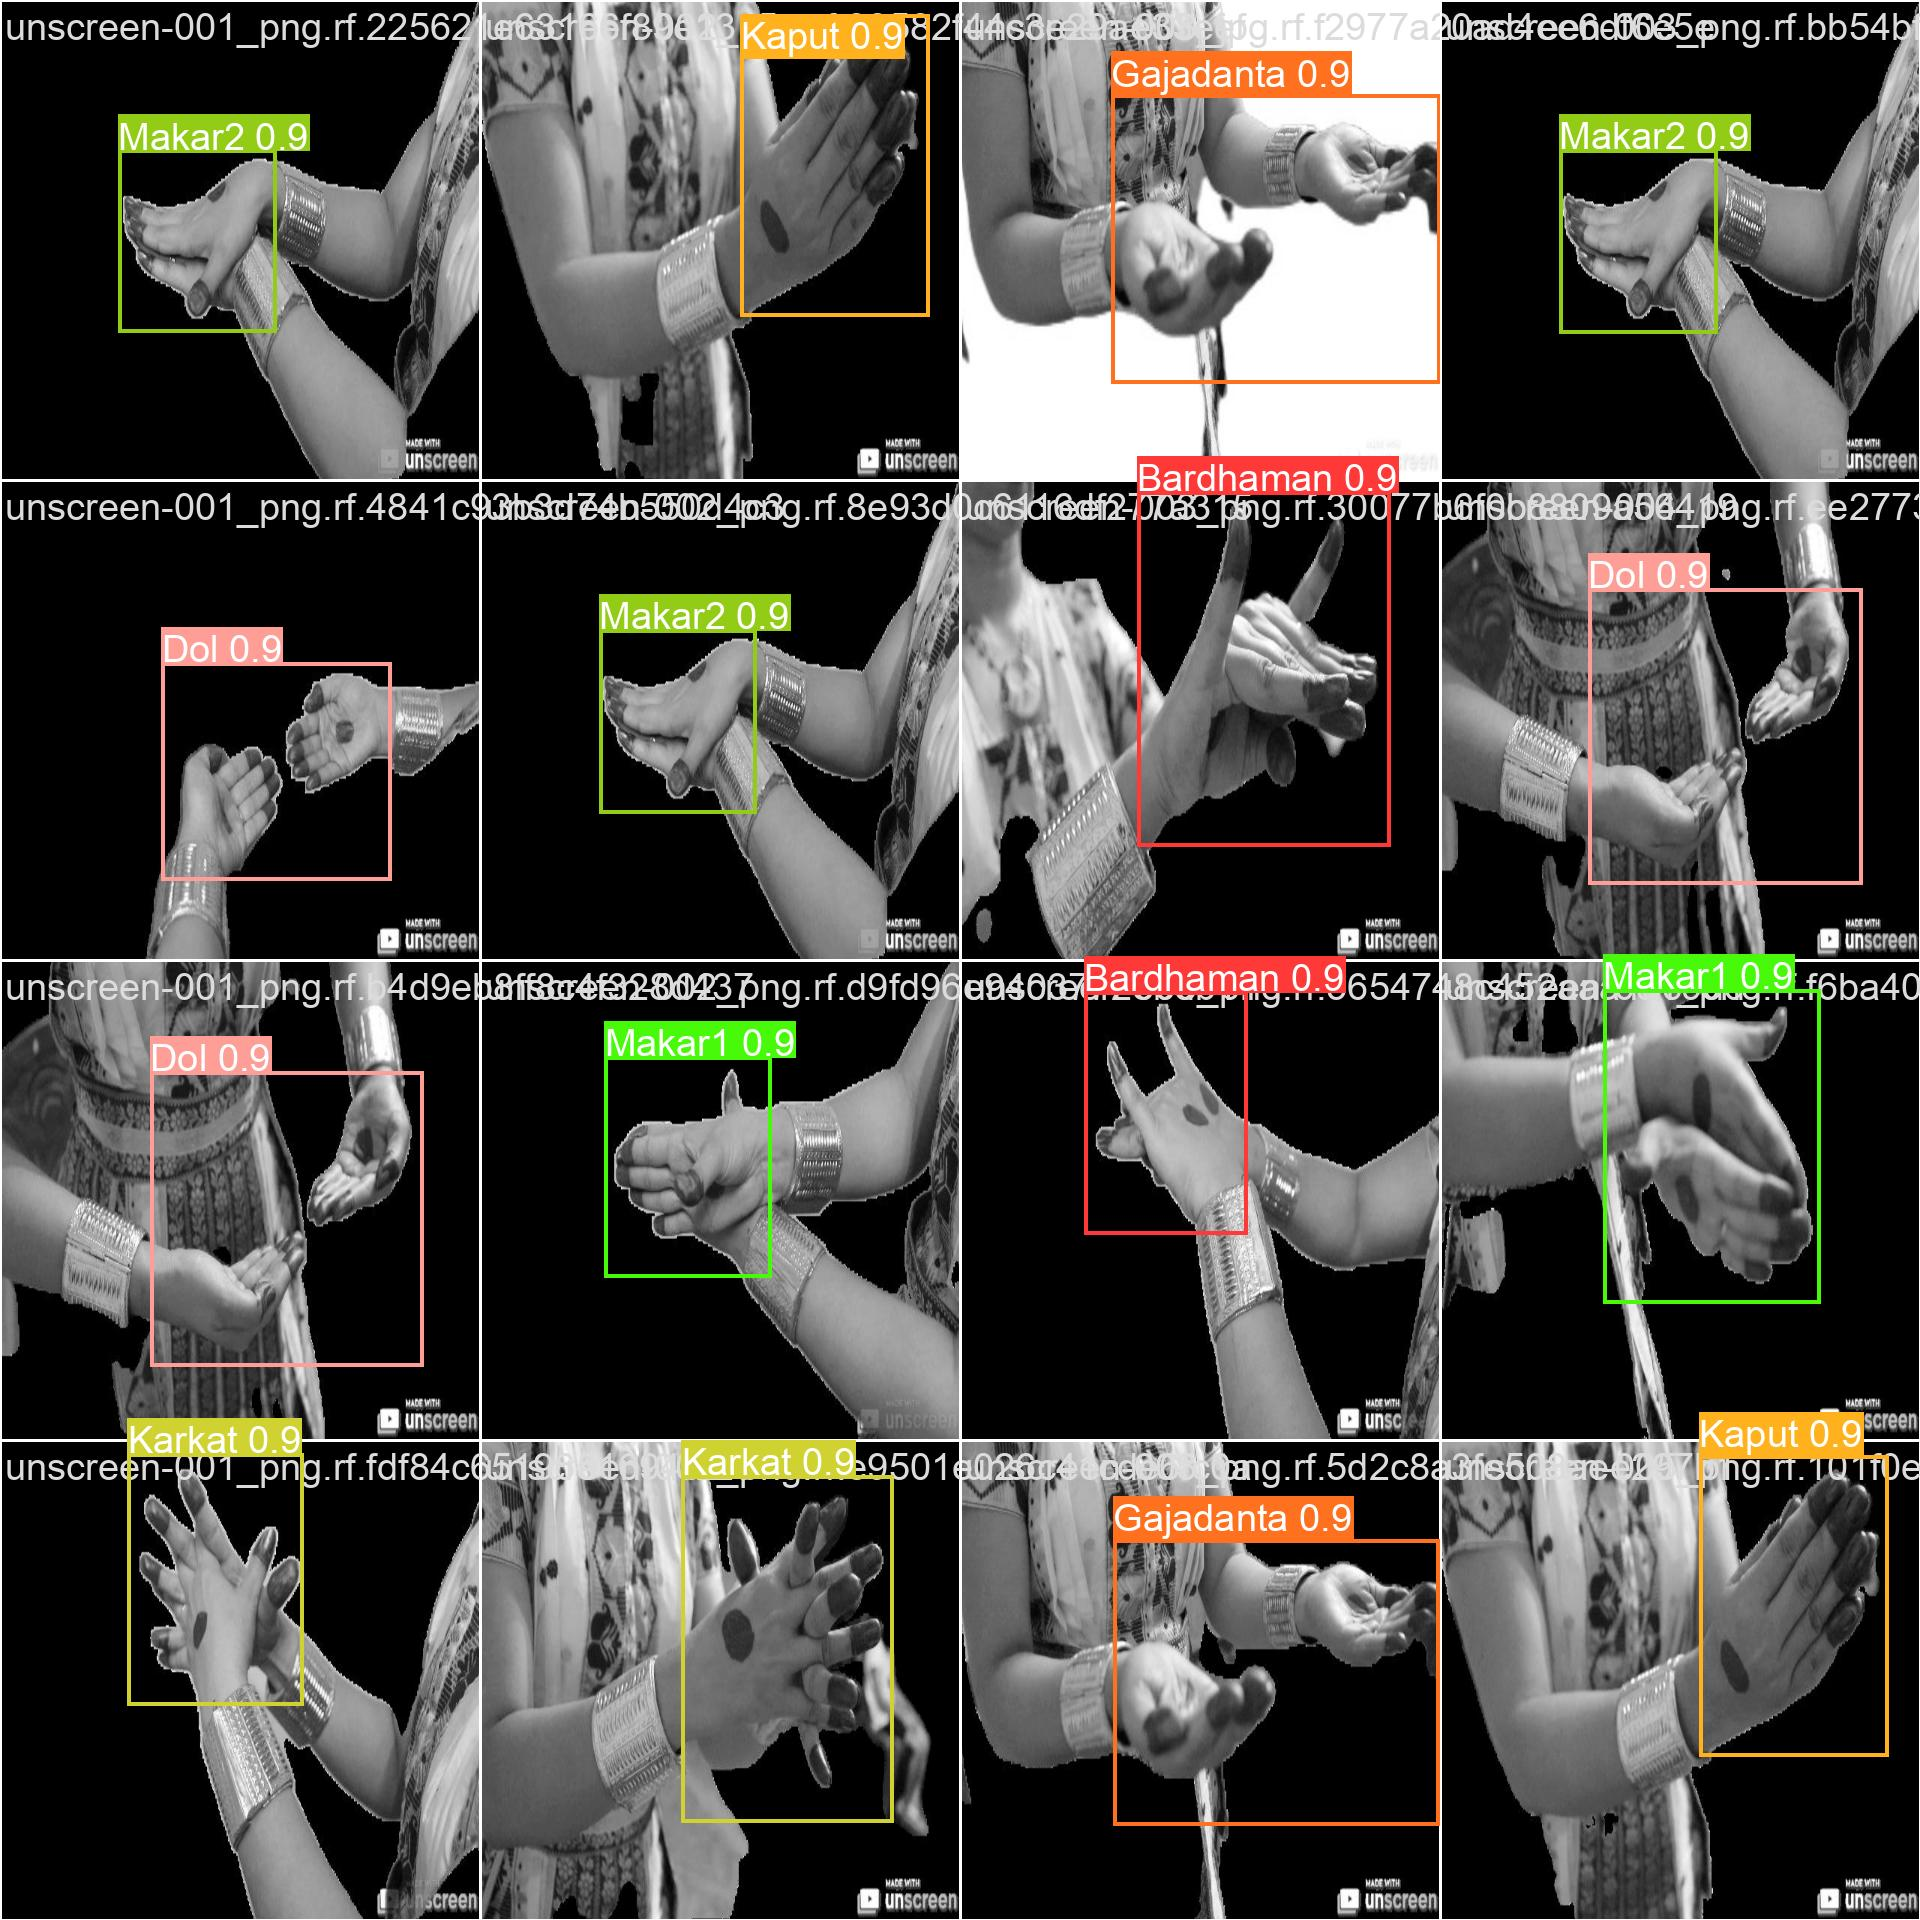

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width = 600)

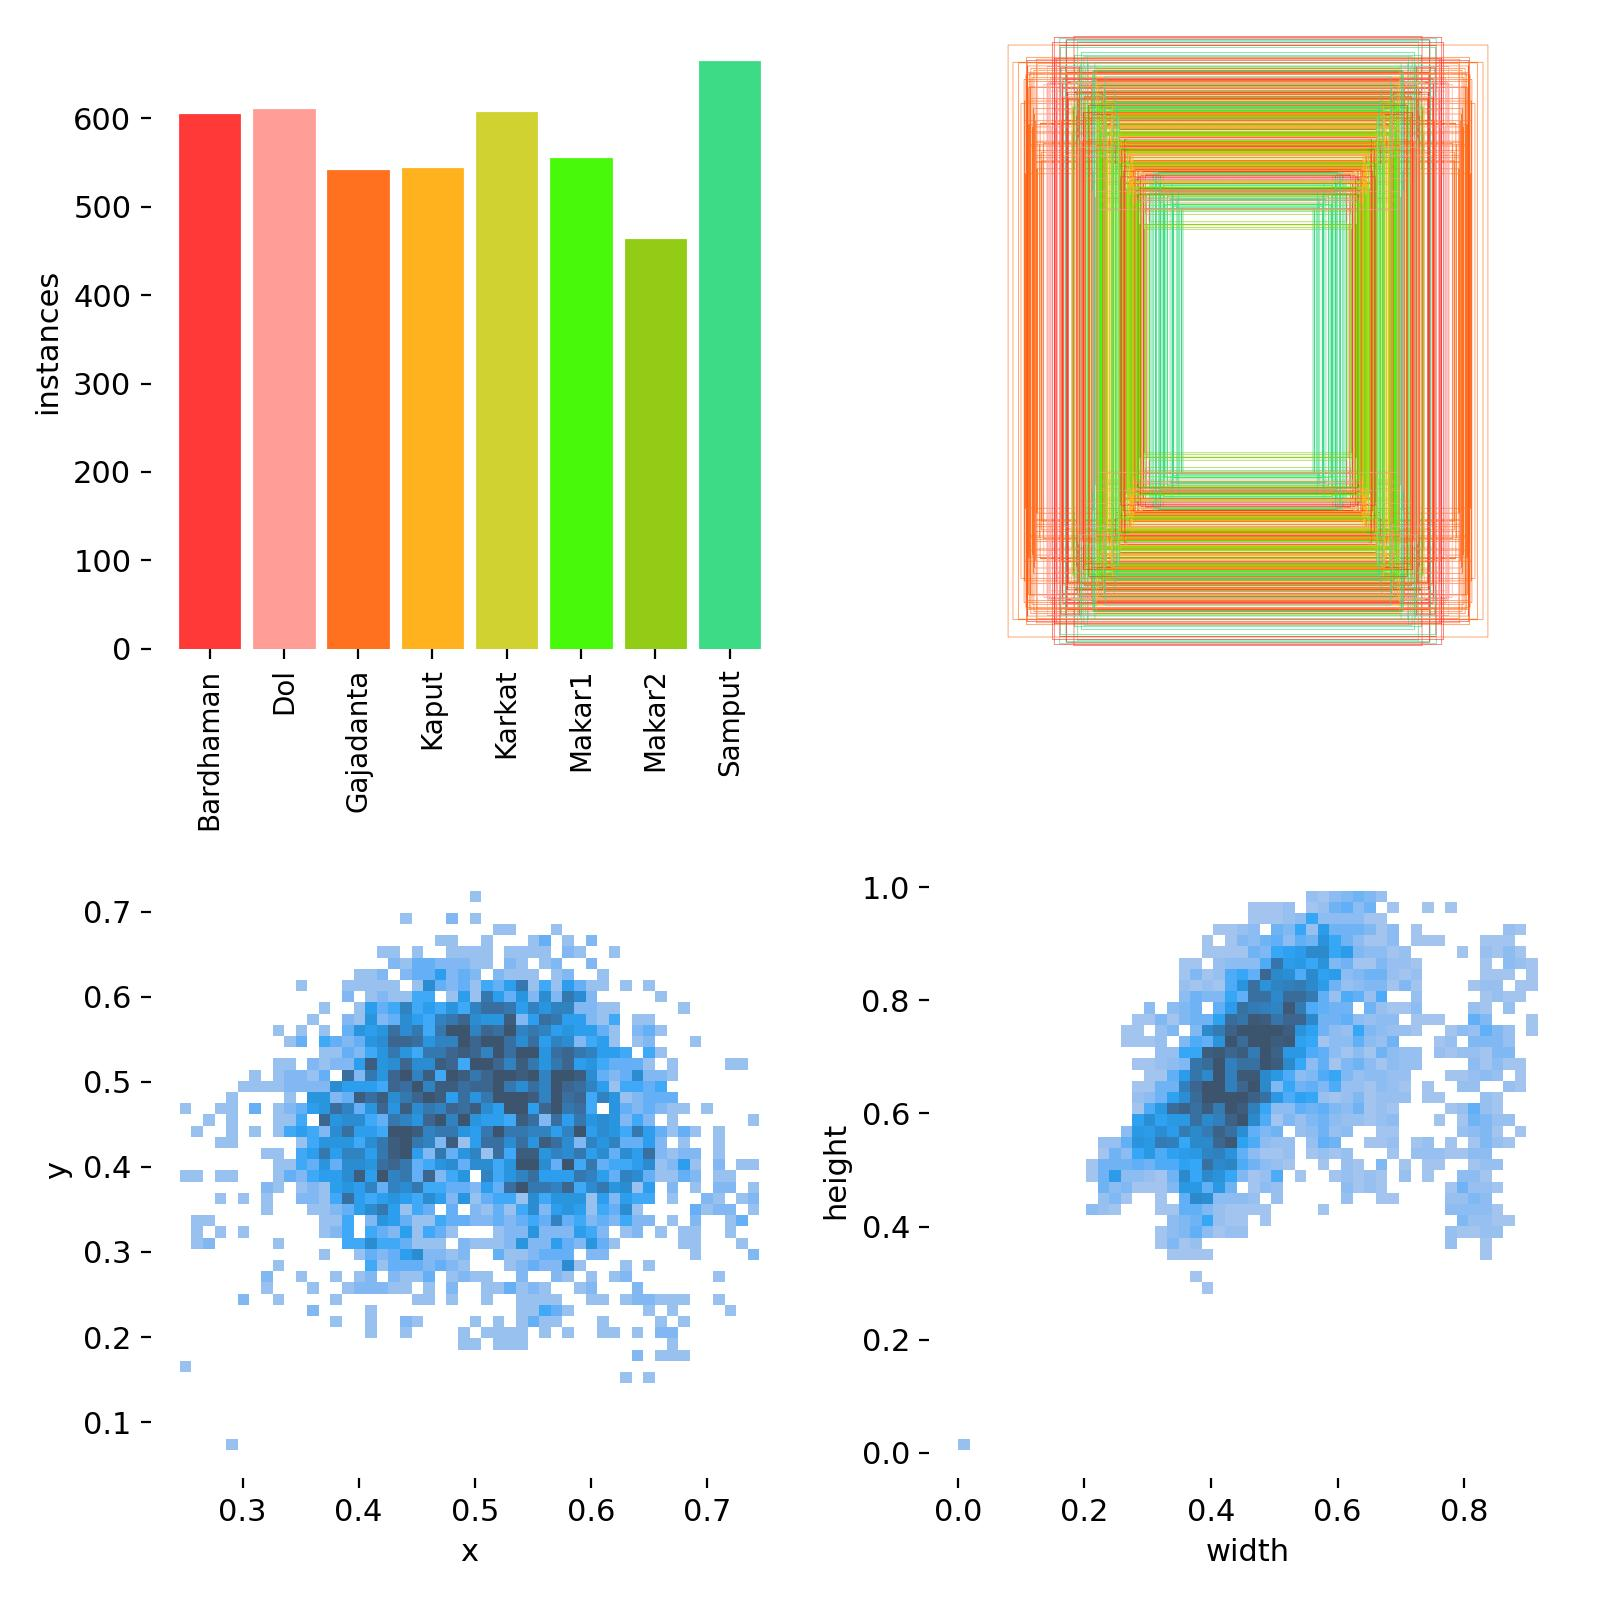

In [ ]:
Image(filename=f'/content/runs/detect/train/labels.jpg', width = 600)

In [2]:
from google.colab import files
from ultralytics import RTDETR

# Upload an image using the Colab file uploader
uploaded = files.upload()

# Get the path to the uploaded image
image_path = next(iter(uploaded.keys()))

# Load a pretrained YOLOv8 model
model = RTDETR('/content/drive/MyDrive/Project/RTDTR_runs/detect/train/weights/best.pt')

# Specify the output directory
output_dir = '/content/drive/MyDrive/Project/RTDETR_Output'

# Run inference on the uploaded image and save the results to the specified directory
results = model(image_path, conf=0.4, save=True, project=output_dir)

Saving unscreen-096.png to unscreen-096.png

image 1/1 /content/unscreen-096.png: 640x640 1 Makar1, 100.0ms
Speed: 15.9ms preprocess, 100.0ms inference, 15.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/Project/RTDETR_Output/predict2
